In [3]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

sns.set(style='whitegrid')

In [4]:
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv/train.csv')
test=pd.read_csv('test.csv/test.csv')

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
features.shape, stores.shape, train.shape, test.shape

((8190, 12), (45, 3), (421570, 5), (115064, 4))

In [10]:
features.info(), stores.info(), train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Typ

(None, None, None, None)

handling missing values of feature table

In [11]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [12]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
train = pd.merge(train,stores,on='Store',how='left')

In [15]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [16]:
train = pd.merge(train,features,on=['Store','Date'],how='left')

In [17]:
train['Date']=pd.to_datetime(train['Date'])

In [18]:
train.sort_values(by=['Date'], inplace=True)

In [19]:
train.set_index(train.Date, inplace=True)

In [20]:
train['IsHoliday_x'].isin(train['IsHoliday_y']).all()

True

In [21]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [22]:
train.drop(columns='IsHoliday_x', inplace=True)
train.rename(columns={'IsHoliday_y':'IsHoliday'}, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [24]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [25]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week

In [26]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


outlier detection and abnormalities

In [27]:
# outliers
agg_data=train.groupby(['Store','Dept']).Weekly_Sales.agg(['max','min','mean','median','std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [28]:
store_data = pd.merge(left=train,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [29]:
data['Date']=pd.to_datetime(data['Date'])
data.sort_values(by=['Date'], inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [30]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [31]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [32]:
data.shape

(421533, 20)

In [33]:
data=data[(np.abs(stats.zscore(data_numeric))<2.5).all(axis=1)]
data.shape

(375438, 20)

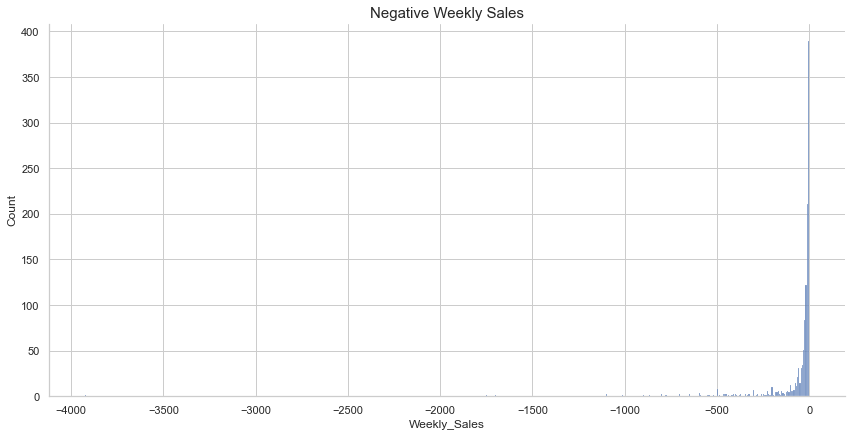

In [34]:
# negative weekly sales
y=data['Weekly_Sales'][data.Weekly_Sales<0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [35]:
data=data[data['Weekly_Sales']>=0]
data.shape

(374247, 20)

In [36]:
data['IsHoliday']=data['IsHoliday'].astype('int')

In [37]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [38]:
data.to_csv('preprocessed_walmart_dataset.csv')

data visualization

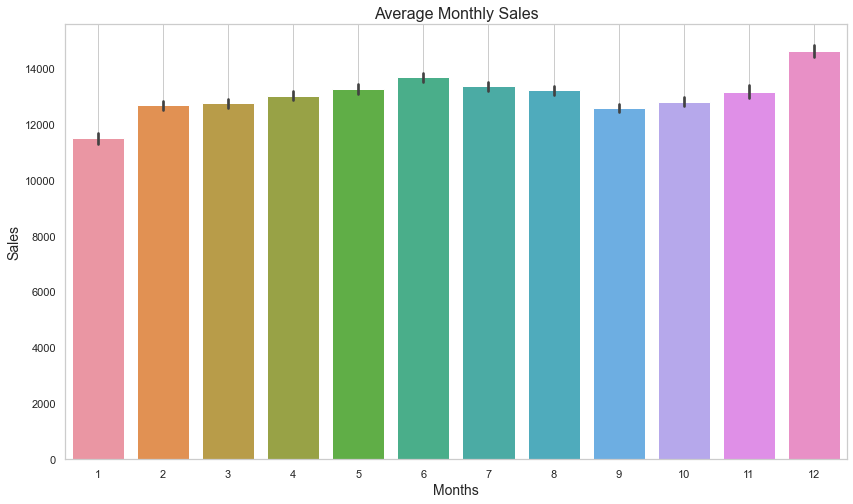

In [39]:
#average monthly sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [40]:
#month;y sales for each year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


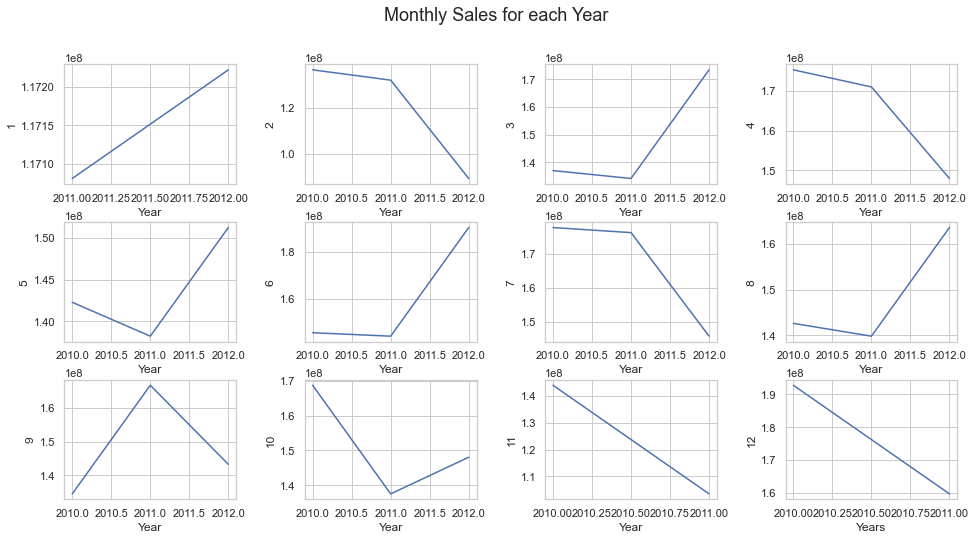

In [41]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1
plt.show()

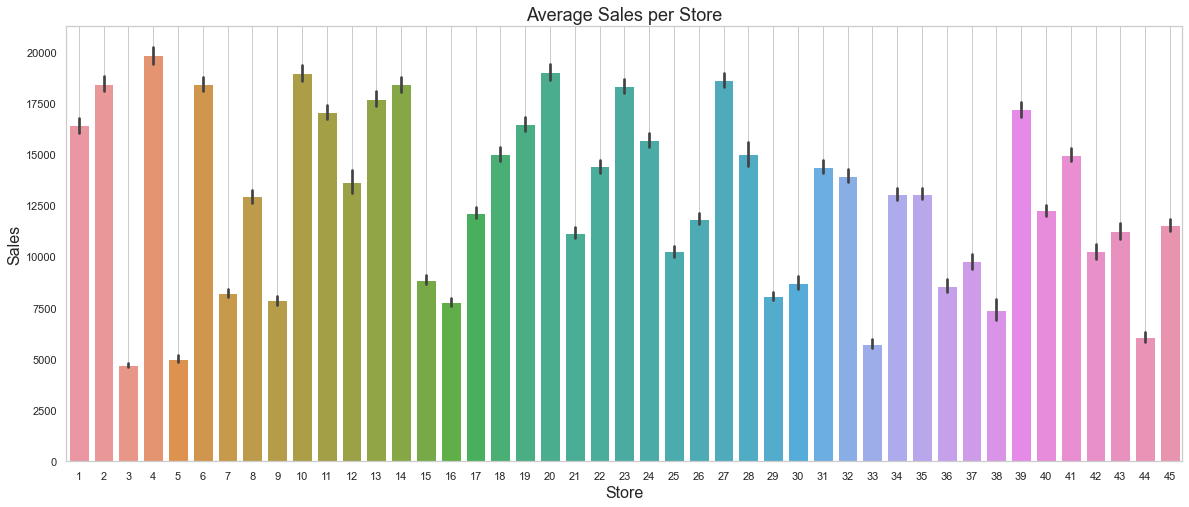

In [42]:
#average weekly sales store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

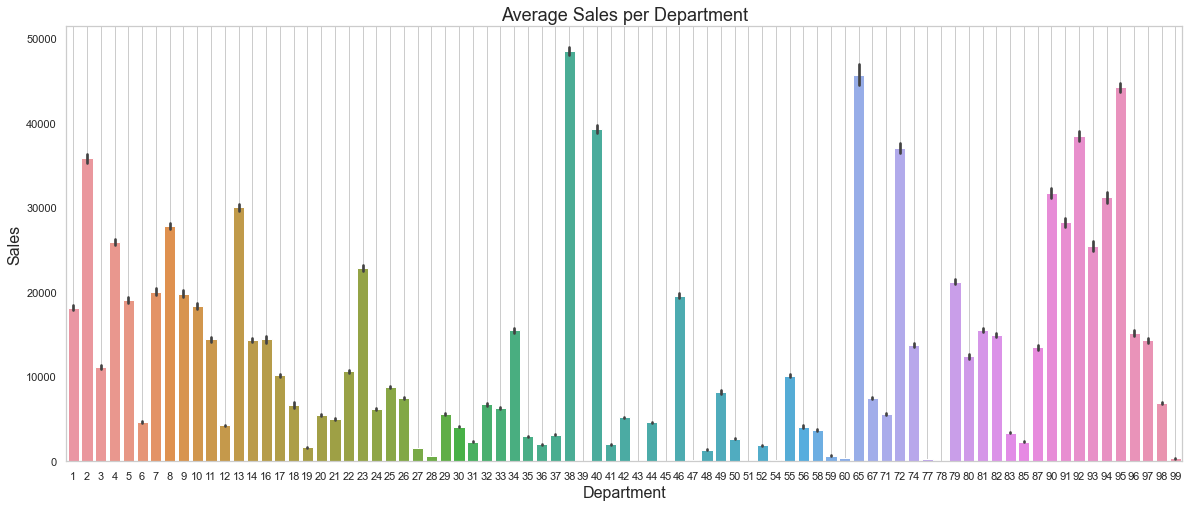

In [43]:
#average weekly sales department wise
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


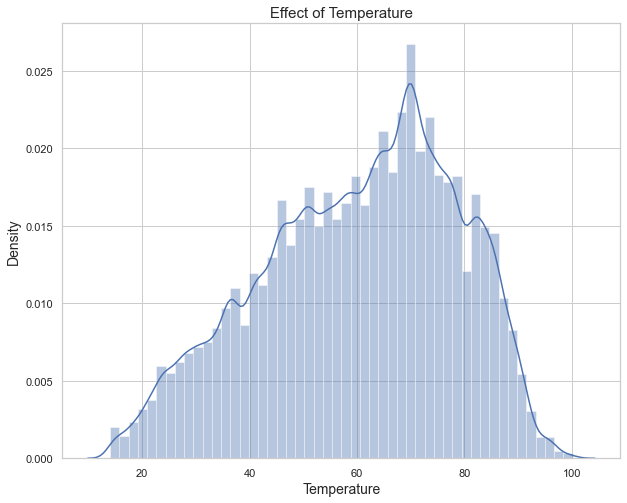

In [46]:
#sales vs temperature
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

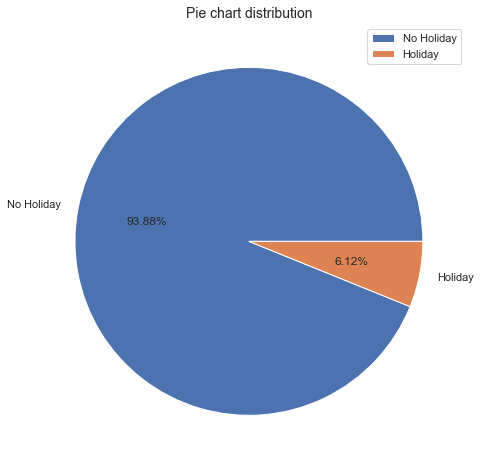

In [48]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

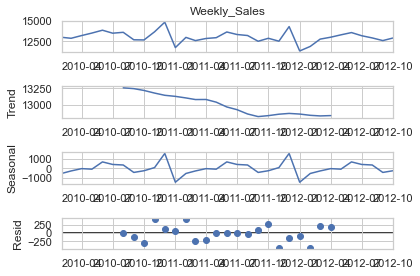

In [53]:
# plt.figure(figsize=(30,10))
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

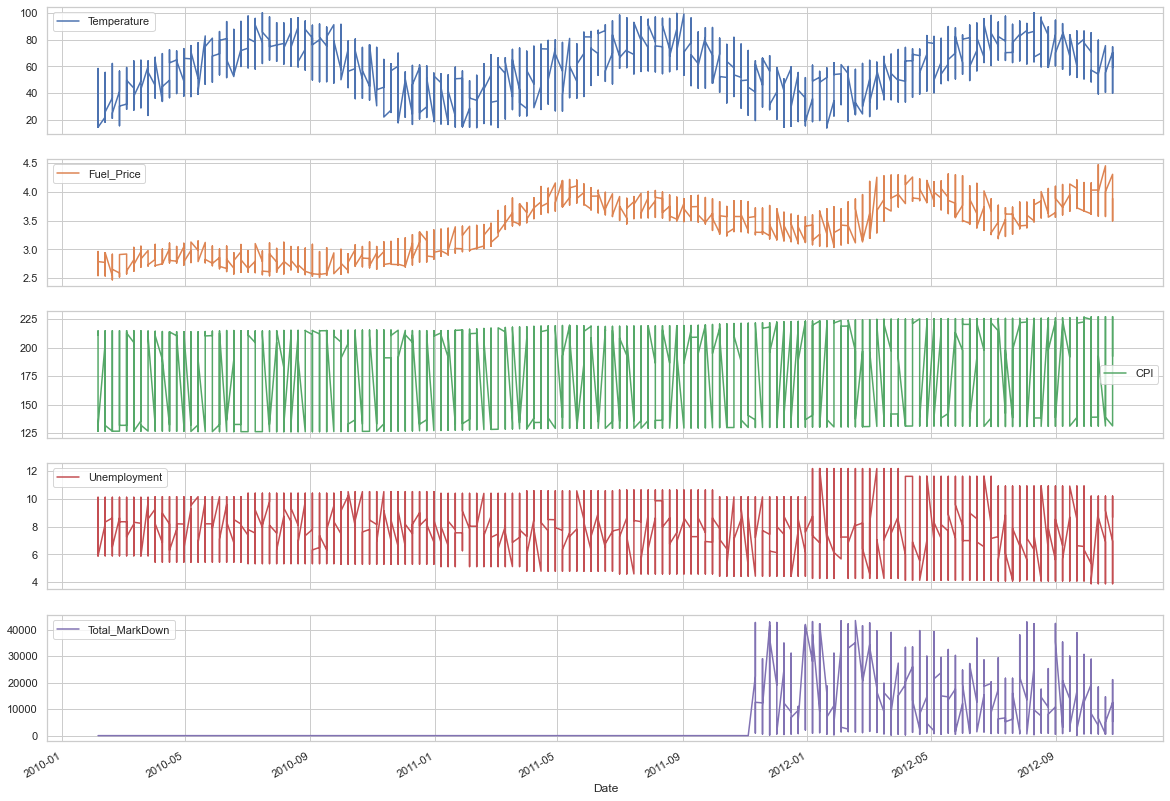

In [55]:
# Plots for the different features in the df: 
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

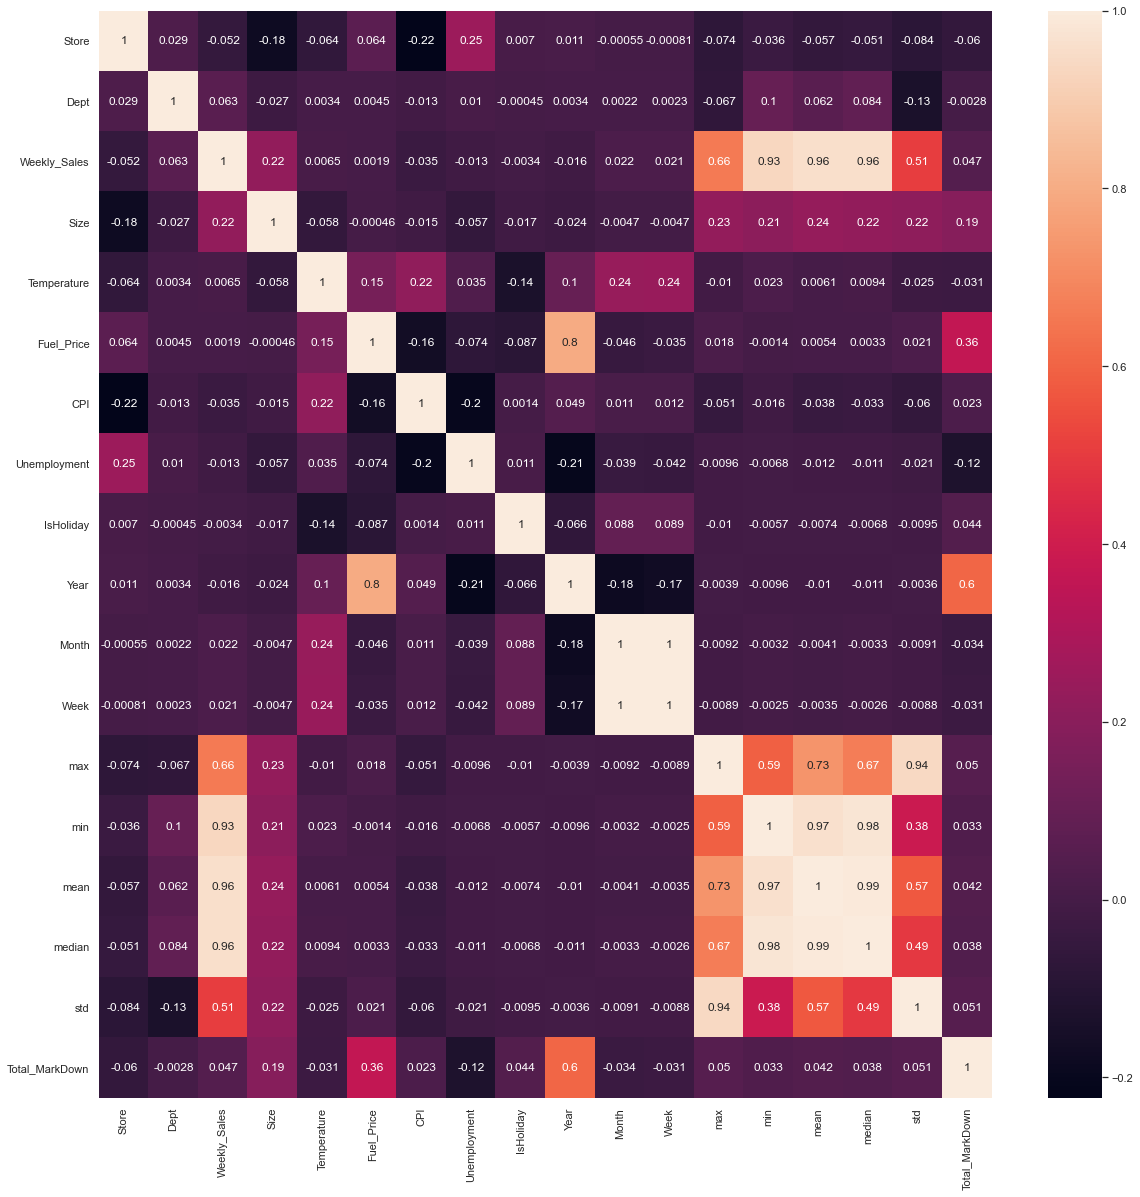

In [59]:
# Correlation between all features
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


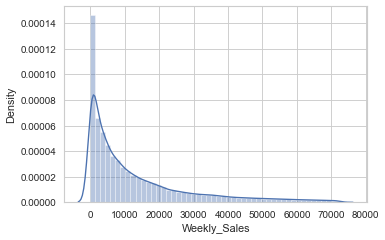

In [61]:
plt.figure(dpi=65)
sns.distplot(data.Weekly_Sales)

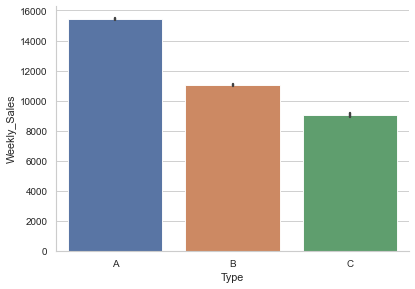

In [97]:
#sales based on type
plt.figure(figsize=(7,5),dpi=65)
sns.barplot(y=data["Weekly_Sales"],x=data["Type"])
sns.despine()

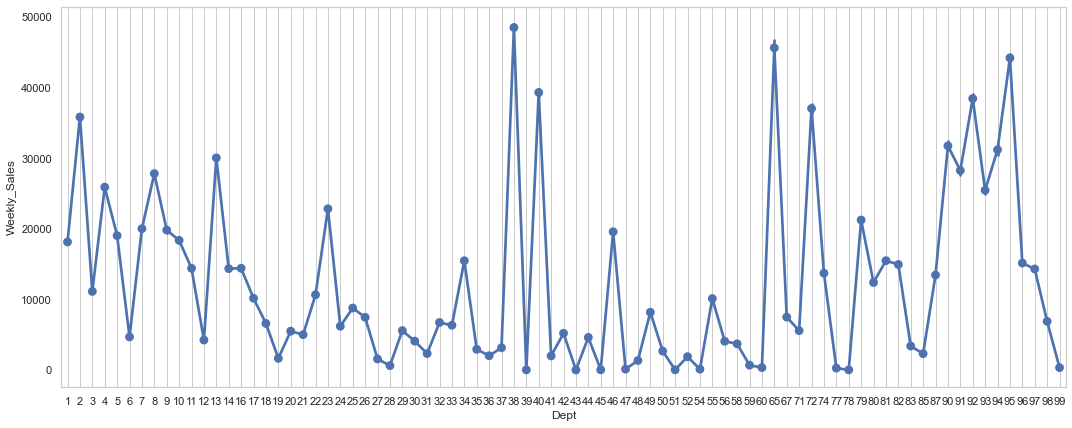

In [72]:
# department wise sales visualization
plt.figure(figsize=(18,7))
sns.pointplot(x='Dept', y='Weekly_Sales',data=data)
plt.grid()

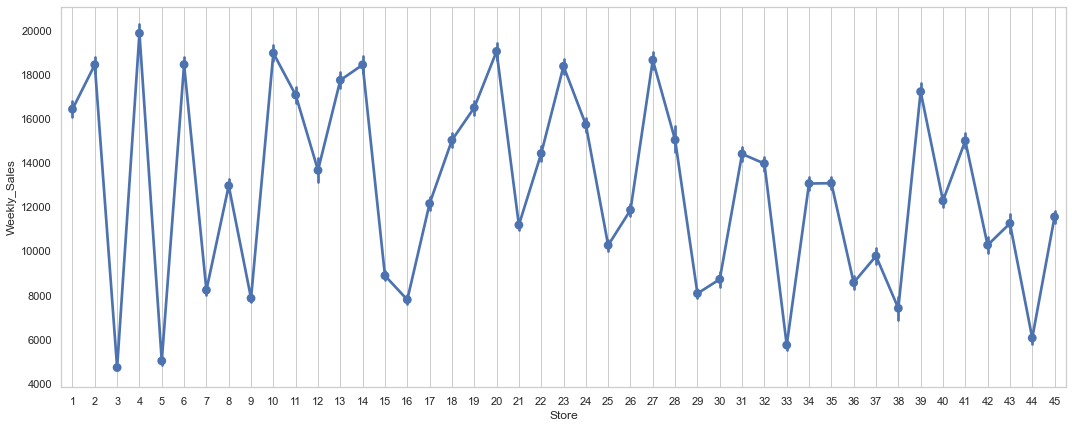

In [74]:
# store wise sales visualization
plt.figure(figsize=(18,7))
sns.pointplot(x='Store', y='Weekly_Sales',data=data)
plt.grid()

In [73]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


AVG OF SALES X WEEK X YEAR

Weekly sales data were grouped by week and year in order to identify the average and median sales per week over the years.

In general, the average values are well above the median, which indicates a high dispersion and variation in sales by stores and departments in a week.

Despite this, there is a certain pattern over the years, with high seasonality at the end of the year.

In [75]:
weekly_sales = data.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = data.loc[data['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = data.loc[data['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = data.loc[data['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

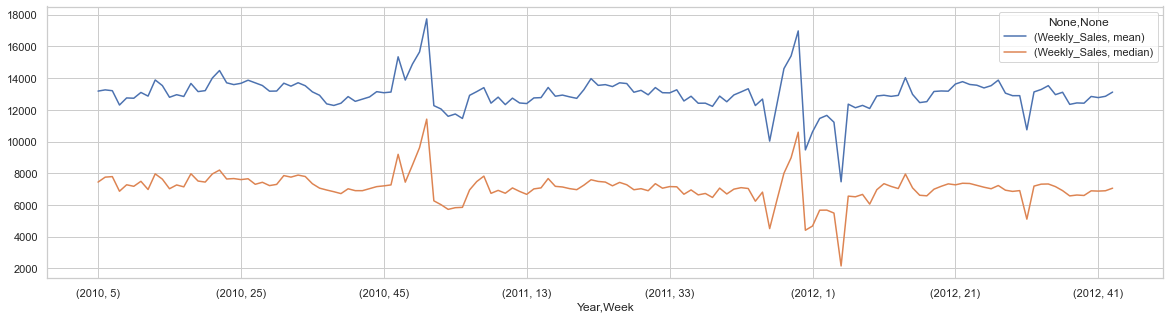

In [76]:
weekly_sales.plot(figsize=(20,5))

The data was also grouped by week but separately for each year, in order to identify patterns between the weeks of different years. As a result, a similar pattern can be seen over the years, with a significant increase in sales in weeks 51 and 47 (Christmas and Thanksgiving). The Superbowl (week 6) and LaborDay holidays (week 36) have little impact on increased sales volume.

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

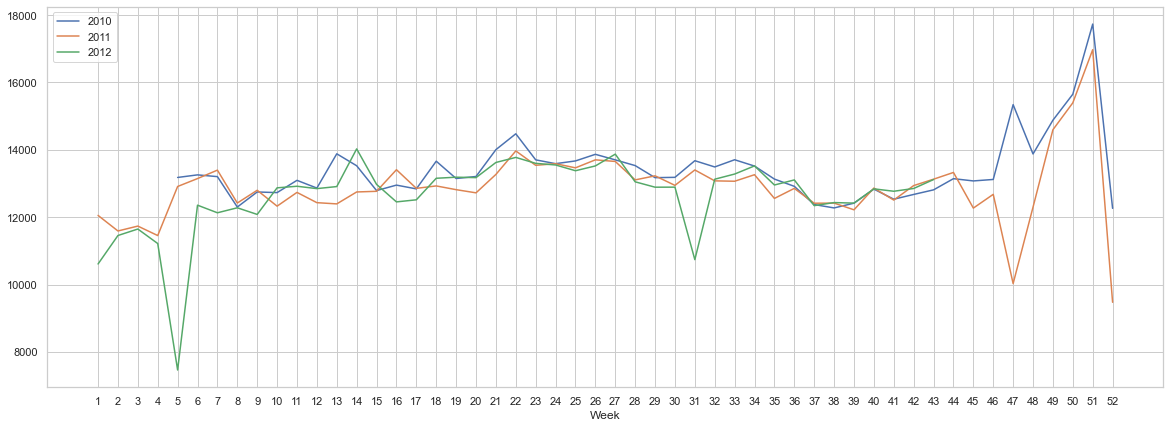

In [79]:
plt.figure(figsize=(20, 7))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

# plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

STORES X WEEK SALES

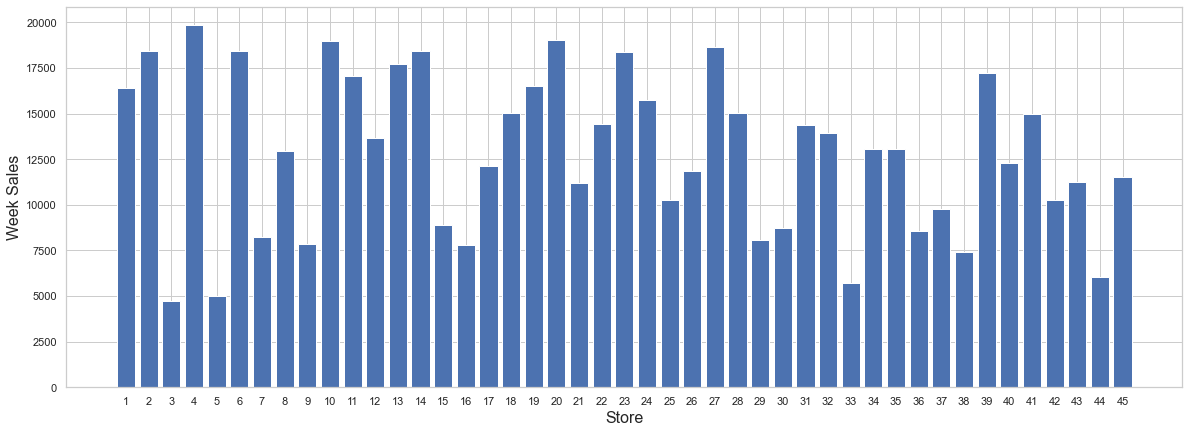

In [84]:
stores = data.groupby(['Store']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.bar(stores.index,stores['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 46, step=1))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

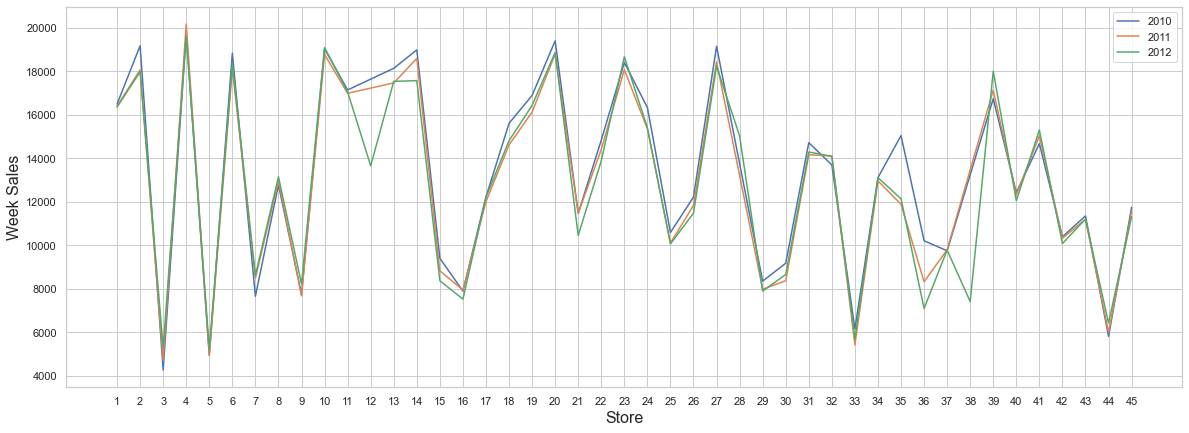

In [85]:
stores_sales2010 = data.loc[data['Year']==2010].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2011 = data.loc[data['Year']==2011].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2012 = data.loc[data['Year']==2012].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(stores_sales2010['Weekly_Sales']['mean'].index, stores_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2011['Weekly_Sales']['mean'].index, stores_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2012['Weekly_Sales']['mean'].index, stores_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 46, step=1))
plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

DEPARTAMENT x WEEK SALES

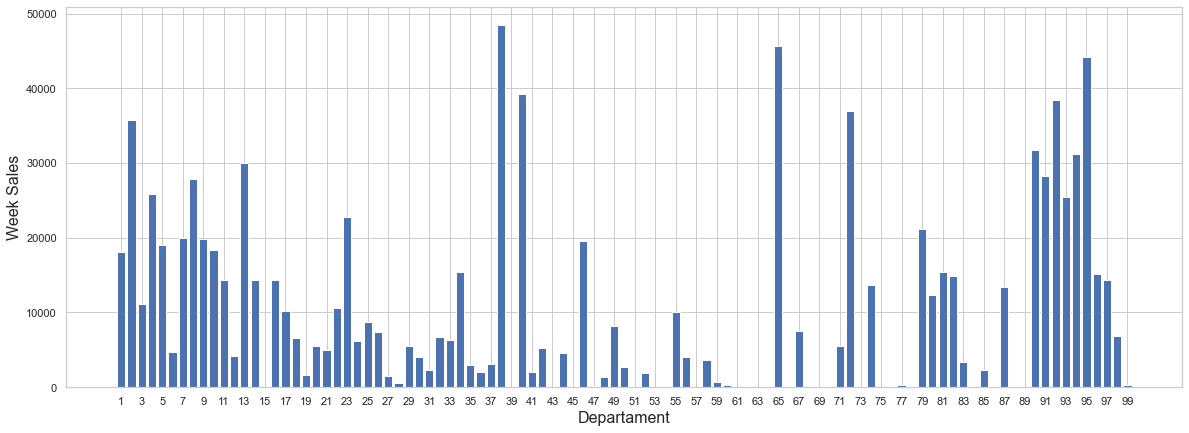

In [86]:
departament = data.groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
plt.bar(departament.index,departament['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 100, step=2))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Departament', fontsize=16)
plt.show()

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

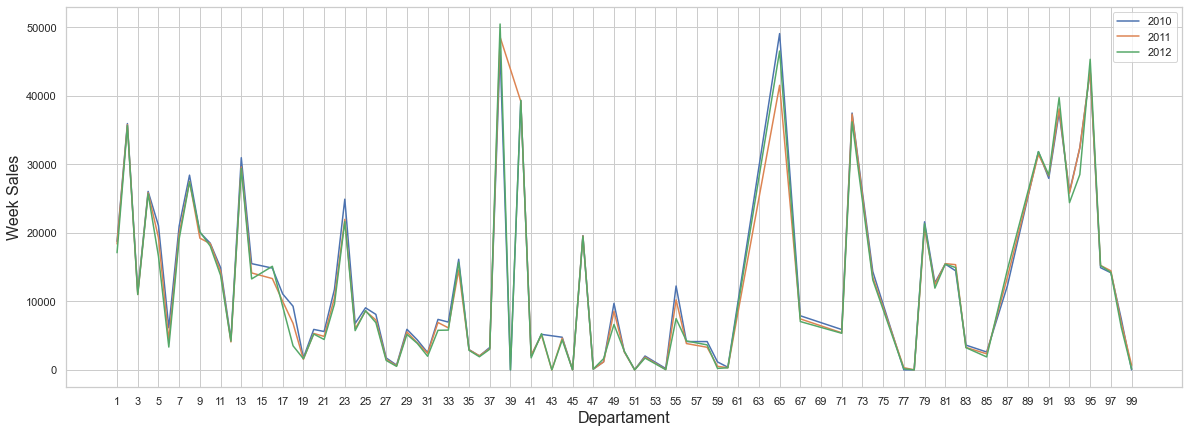

In [87]:
departament_sales2010 = data.loc[data['Year']==2010].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
departament_sales2011 = data.loc[data['Year']==2011].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
departament_sales2012 = data.loc[data['Year']==2012].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(departament_sales2010['Weekly_Sales']['mean'].index, departament_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(departament_sales2011['Weekly_Sales']['mean'].index, departament_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(departament_sales2012['Weekly_Sales']['mean'].index, departament_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 100, step=2))
plt.legend(['2010', '2011', '2012'])

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Departament', fontsize=16)
plt.show()

SIZE x WEEK SALES

Grouping weekly sales by store size, the chart below seems to indicate a certain trend towards higher sales for larger stores.

However, this relationship is far from being proportionally linear, with several cases contradicting this trend.

Text(0.5, 0, 'Size')

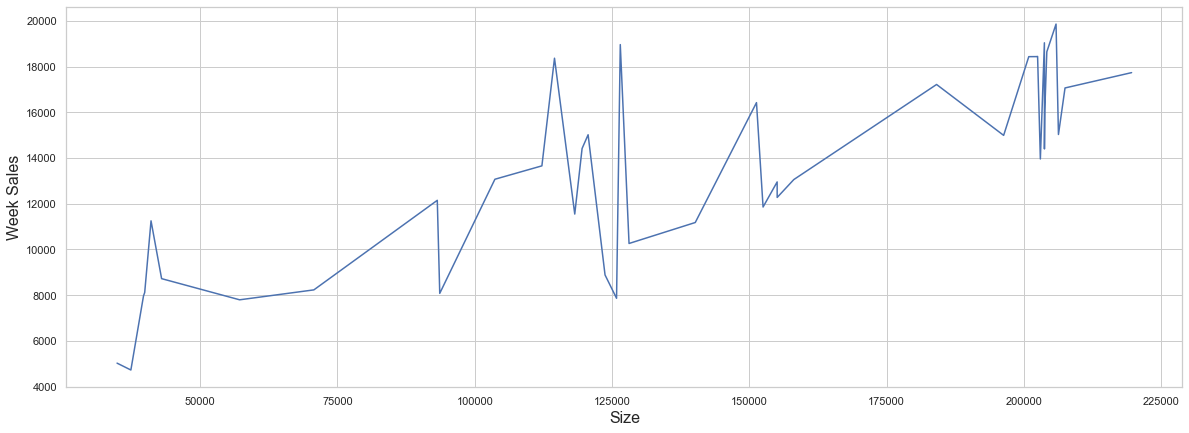

In [88]:
size = data.groupby(['Size']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.plot(size)
#plt.xticks(np.arange(1, 100, step=2))
#plt.show()

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

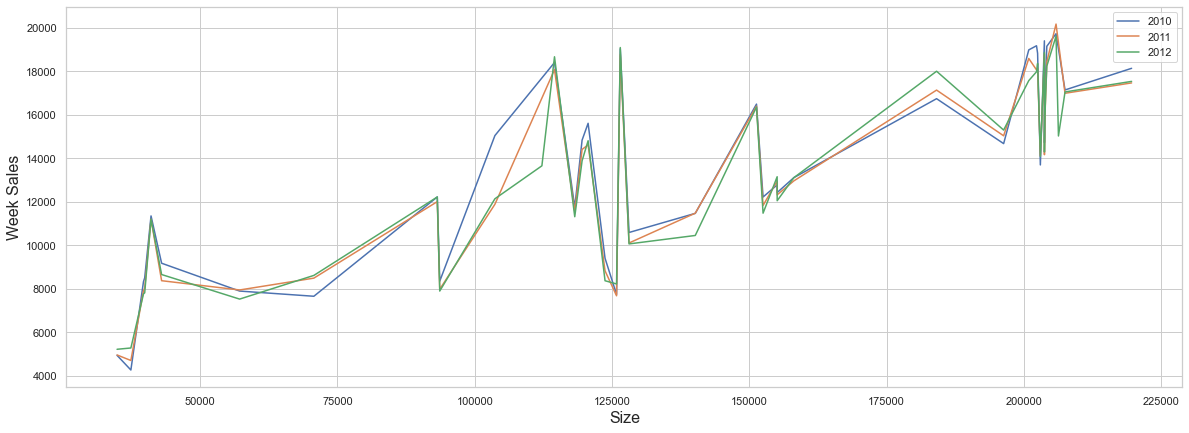

In [89]:
size_sales2010 = data.loc[data['Year']==2010].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})
size_sales2011 = data.loc[data['Year']==2011].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})
size_sales2012 = data.loc[data['Year']==2012].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(size_sales2010['Weekly_Sales']['mean'].index, size_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(size_sales2011['Weekly_Sales']['mean'].index, size_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(size_sales2012['Weekly_Sales']['mean'].index, size_sales2012['Weekly_Sales']['mean'].values)

plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)
plt.show()

TYPE x WEEK SALES

The 'type' feature also seems to have a certain relationship with Weekly Sales. Type 'A' (transformed to '3') has a higher sales median than types 'B' and 'C', in addition to a greater dispersion of sales values around this median. Type 'C' (transformed to '1') tends to have lower weekly sales.

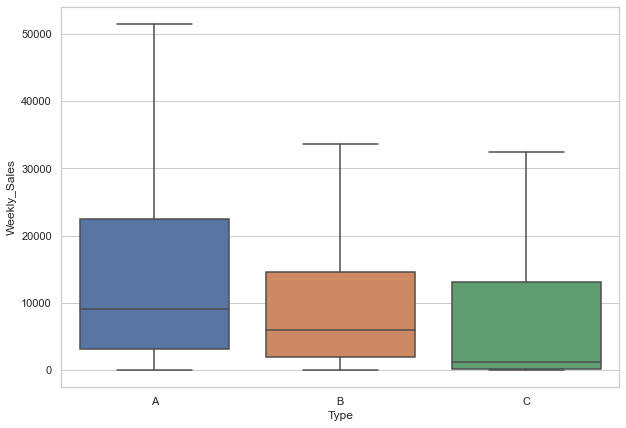

In [92]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=data,showfliers = False)

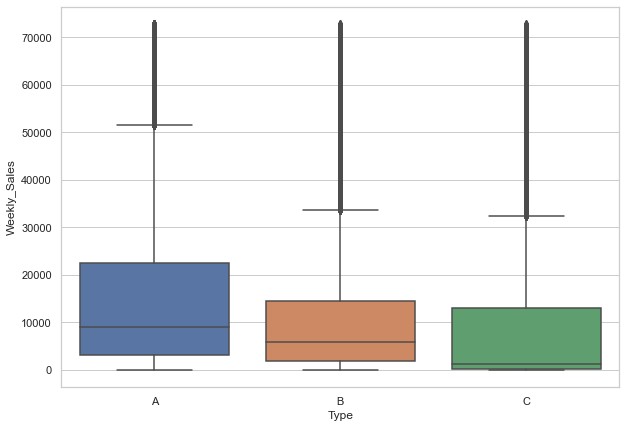

In [99]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=data,showfliers = True)

In [96]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


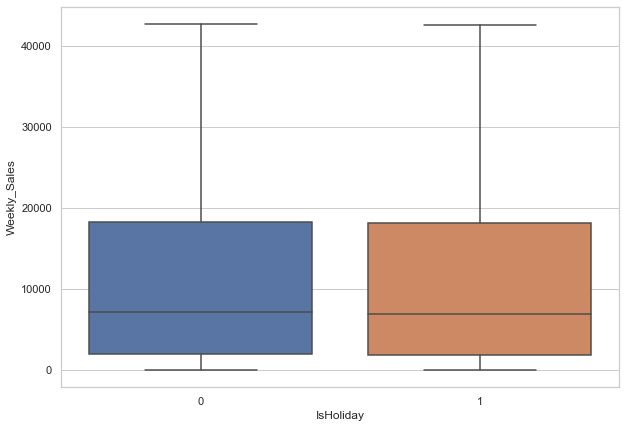

In [103]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data,showfliers = False)

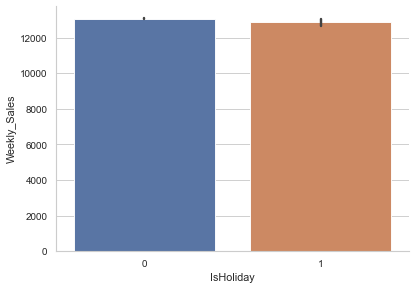

In [104]:
#sales based on holiday
plt.figure(figsize=(7,5),dpi=65)
sns.barplot(y=data["Weekly_Sales"],x=data["IsHoliday"])
sns.despine()

In [111]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


Text(0.5, 0, 'Fuel Price')

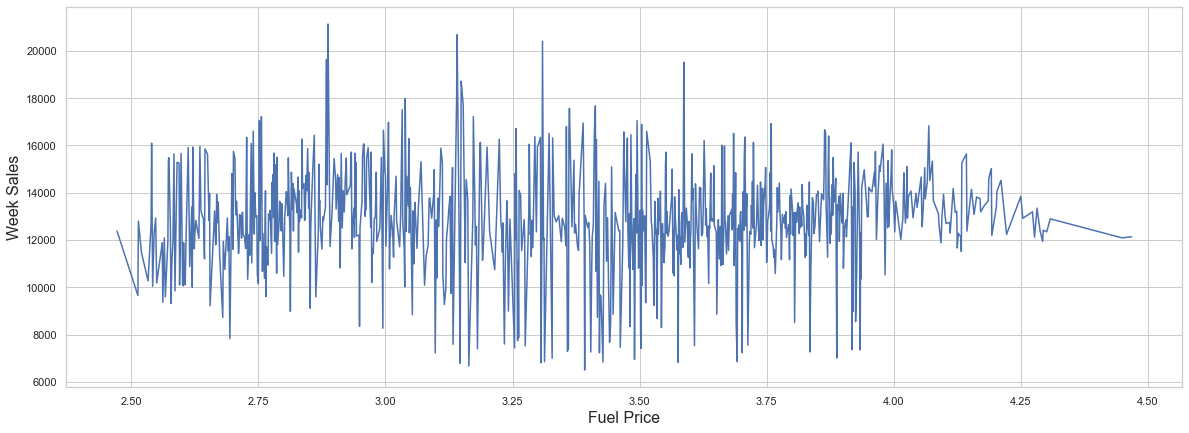

In [114]:
fuel = data.groupby(['Fuel_Price']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.plot(fuel)
#plt.xticks(np.arange(1, 100, step=2))
#plt.show()

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Fuel Price', fontsize=16)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

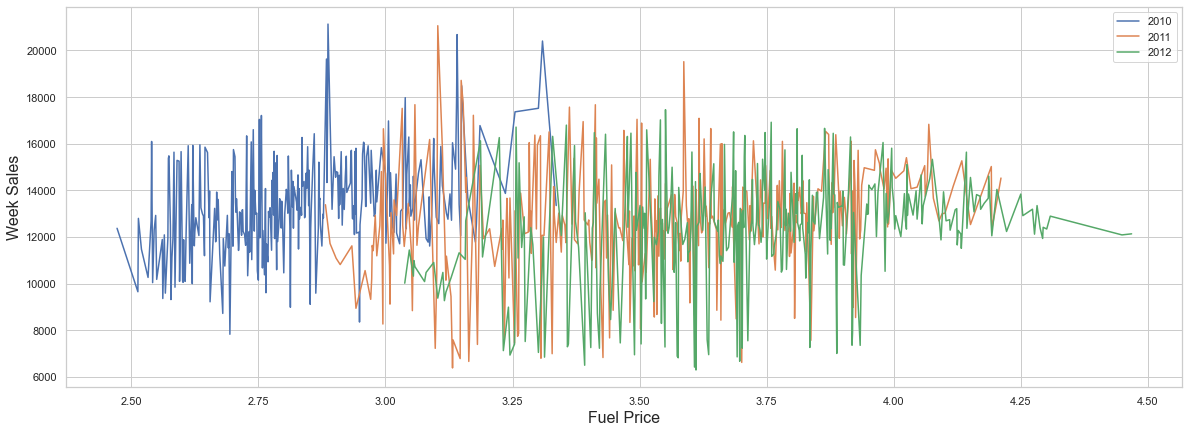

In [115]:
fuel_sales2010 = data.loc[data['Year']==2010].groupby(['Fuel_Price']).agg({'Weekly_Sales': ['mean', 'median']})
fuel_sales2011 = data.loc[data['Year']==2011].groupby(['Fuel_Price']).agg({'Weekly_Sales': ['mean', 'median']})
fuel_sales2012 = data.loc[data['Year']==2012].groupby(['Fuel_Price']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(fuel_sales2010['Weekly_Sales']['mean'].index, fuel_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(fuel_sales2011['Weekly_Sales']['mean'].index, fuel_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(fuel_sales2012['Weekly_Sales']['mean'].index, fuel_sales2012['Weekly_Sales']['mean'].values)

plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Fuel Price', fontsize=16)
plt.show()

In [116]:
data.dtypes

Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
Type                      object
Size                       int64
Temperature              float64
Fuel_Price               float64
CPI                      float64
Unemployment             float64
IsHoliday                  int32
Year                       int64
Month                      int64
Week                       int64
max                      float64
min                      float64
mean                     float64
median                   float64
std                      float64
Total_MarkDown           float64
dtype: object

In [119]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [118]:
data.Type.nunique()

3

one-hot-encoding

In [39]:
cat_col=['Store','Dept','Type']
data_cat=data[cat_col].copy()

In [40]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [41]:
data_cat=pd.get_dummies(data_cat,columns=cat_col)

In [42]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
data.shape

(374247, 20)

In [44]:
data=pd.concat([data,data_cat],axis=1)

In [45]:
data.shape

(374247, 149)

In [46]:
data.drop(columns=cat_col, inplace=True)

In [47]:
data.drop(columns=['Date'], inplace=True)

In [48]:
data.shape

(374247, 145)

data normalization

In [49]:
num_col=['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [50]:
minmax_scale=MinMaxScaler(feature_range=(0,1))
def normalization(df, col):
    for i in col:
        arr=df[i]
        arr=np.array(arr)
        df[i]=minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [51]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data=normalization(data.copy(), num_col)

In [53]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


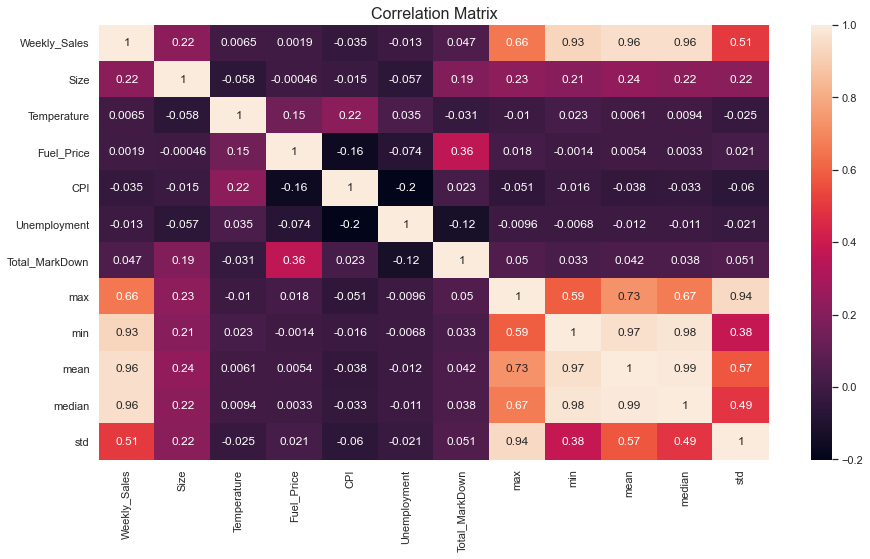

In [54]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

recursive feature elimination

In [55]:
feature_col=data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [56]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [57]:
pkl_filename = "feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [58]:
indices=np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank=pd.DataFrame(columns=['rank','feature','importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f]=[f+1,
                        data[feature_col].columns[indices[f]],
                        radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,6.323225e-01
1,2,median,2.957364e-01
2,3,Week,1.939902e-02
3,4,Temperature,8.834131e-03
4,5,CPI,5.982811e-03
...,...,...,...
139,140,Dept_51,2.928299e-10
140,141,Dept_45,1.924091e-10
141,142,Dept_78,4.340054e-12
142,143,Dept_39,1.891761e-14


In [59]:
x=feature_rank.loc[0:22, ['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'CPI', 'max', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_11', 'Year', 'Dept_9', 'Dept_1', 'Dept_5', 'Dept_55']


In [60]:
X=data[x]
Y=data['Weekly_Sales']

In [61]:
data=pd.concat([X,Y], axis=1)

In [62]:
data

,mean,median,Week,Temperature,CPI,max,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Dept_11,Year,Dept_9,Dept_1,Dept_5,Dept_55,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.840500,0.088635,0.050100,0.253530,0.508787,0.138276,...,0,0,0.630267,0,2010,0,1,0,0,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.875680,0.001180,0.050100,0.064648,0.305248,0.004083,...,0,0,0.492338,0,2010,0,0,0,0,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.875680,0.003866,0.050100,0.066212,0.305248,0.004314,...,0,0,0.492338,0,2010,0,0,0,0,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.873861,0.018453,0.050100,0.161046,0.291286,0.010611,...,0,0,0.650636,0,2010,0,0,0,0,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.875680,0.044887,0.050100,0.126993,0.305248,0.054362,...,0,0,0.492338,0,2010,0,0,0,1,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.958935,0.030286,0.518036,0.119050,0.275758,0.039642,...,0,0,0.906277,0,2012,0,0,0,0,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.050698,0.000446,0.916333,0.064822,0.760713,0.000478,...,0,0,0.026063,0,2012,0,0,0,0,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.165055,0.063107,0.801102,0.097548,0.496028,0.072670,...,0,0,0.916437,0,2012,0,0,0,0,0.073391


In [63]:
data.to_csv('final_data.csv')

splitting data

In [63]:
X=data.drop(['Weekly_Sales'], axis=1)
Y=data.Weekly_Sales

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=50)

linear regression model

In [66]:
lr=LinearRegression(normalize=False)
lr.fit(X_train, y_train)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [67]:
lr_acc=lr.score(X_test, y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.27828803090456


In [68]:
y_pred=lr.predict(X_test)

In [69]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030056426266717555
MSE 0.0034862759576421015
RMSE 0.059044694576584116
R2 0.9227828958914515


In [70]:
lr_df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
lr_df.to_csv('lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132668
2010-07-09,0.364278,0.279822
2011-07-01,0.005003,0.026248
2012-01-06,0.015856,0.015397
2011-08-26,0.000318,0.002140
...,...,...
2011-01-28,0.169068,0.236252
2010-08-20,0.252860,0.235734
2010-11-26,0.265617,0.321761


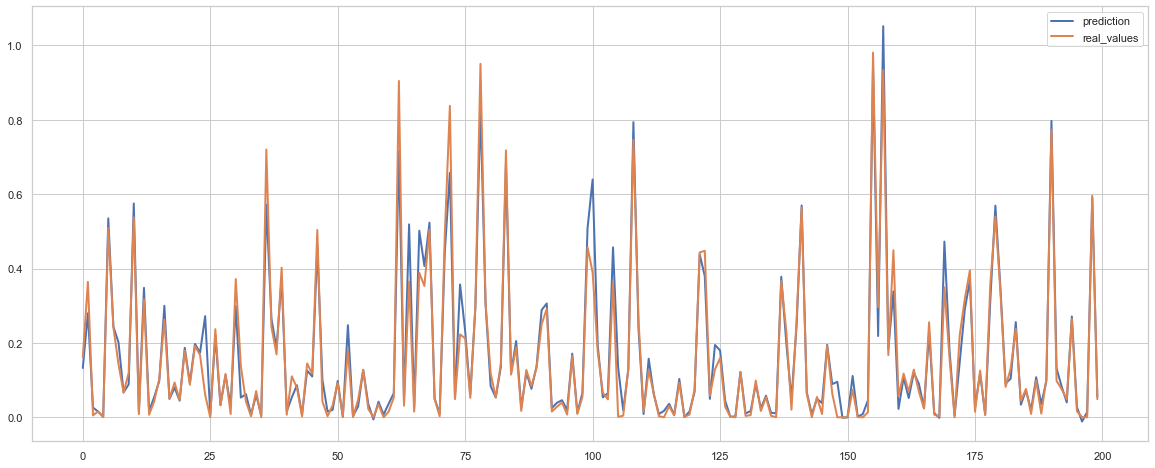

In [71]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

random forest regressor model

In [72]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
rf_acc=rf.score(X_test, y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.8771007609584


In [74]:
y_pred=rf.predict(X_test)

In [75]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015547726979454982
MSE 0.0009584678381152331
RMSE 0.030959131740332012
R2 0.9787713296383945


In [76]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.124819
2010-07-09,0.364278,0.328988
2011-07-01,0.005003,0.014062
2012-01-06,0.015856,0.020242
2011-08-26,0.000318,0.000504
...,...,...
2011-01-28,0.169068,0.175473
2010-08-20,0.252860,0.264865
2010-11-26,0.265617,0.364263


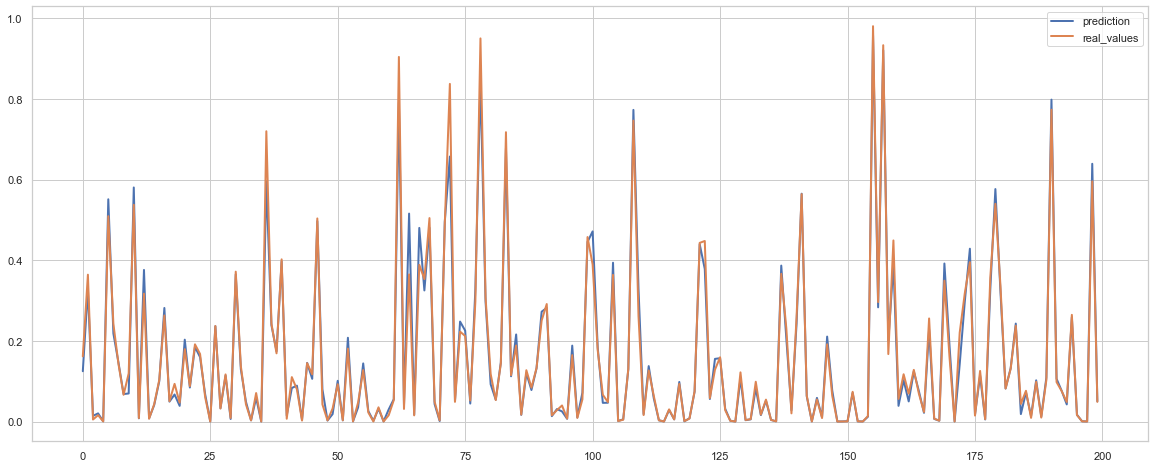

In [77]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

K neighbors regressor

In [78]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [79]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.94340803896885


In [80]:
y_pred = knn.predict(X_test)

In [81]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03341948725813976
MSE 0.0036374709347732695
RMSE 0.06031144945011079
R2 0.919620685896038


In [82]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063
...,...,...
2011-01-28,0.169068,0.229475
2010-08-20,0.252860,0.262688
2010-11-26,0.265617,0.203904


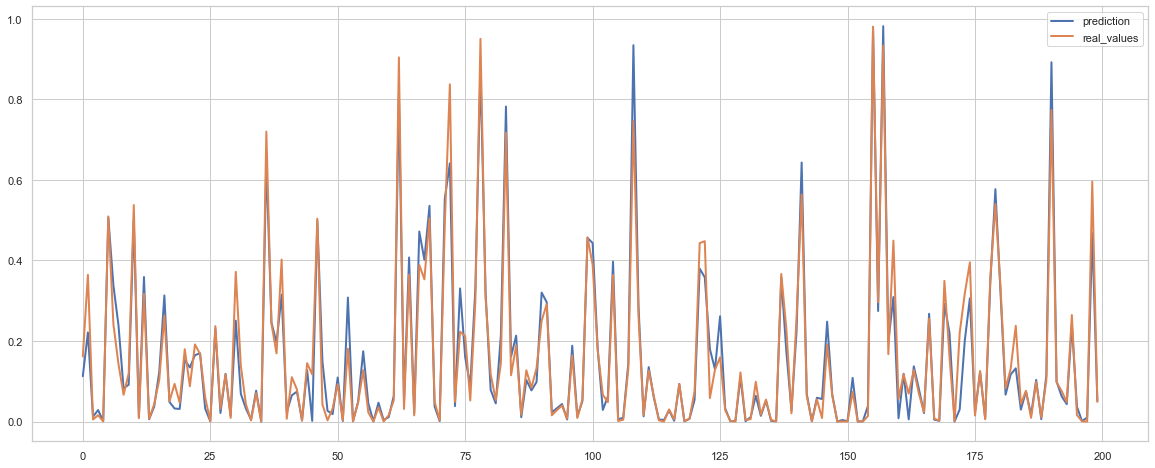

In [83]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

support vector regressor

In [ ]:
svr = SVR()
svr.fit(X_train,y_train)

In [ ]:
svr_acc=svr.score(X_test, y_test)*100
print("Support Vector Regressor Accuracy - ",svr_acc)

In [ ]:
y_pred=svr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [ ]:
svr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
svr_df.to_csv('svr_real_pred.csv')
svr_df

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(svr.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

xgboost regressor

In [87]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.25689149839047


In [89]:
y_pred = xgbr.predict(X_test)

In [90]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01998056589935572
MSE 0.0012384861357999152
RMSE 0.0351921317313958
R2 0.972569208963071


In [91]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.126879
2010-07-09,0.364278,0.318090
2011-07-01,0.005003,0.017094
2012-01-06,0.015856,0.019855
2011-08-26,0.000318,-0.000916
...,...,...
2011-01-28,0.169068,0.223624
2010-08-20,0.252860,0.249065
2010-11-26,0.265617,0.356145


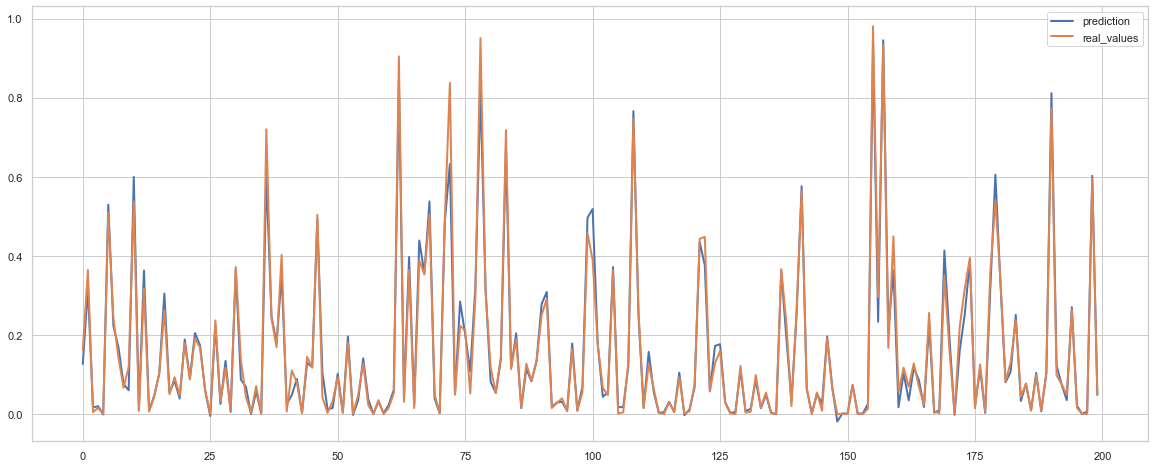

In [92]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

neural network

In [93]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [94]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

In [95]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

Epoch 1/100
48/48 [==============================] - 1s 26ms/step - loss: 0.9869 - val_loss: 0.3749
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.2310 - val_loss: 0.2129
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.2023 - val_loss: 0.1820
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1630 - val_loss: 0.1605
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.1762 - val_loss: 0.1729
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1817 - val_loss: 0.2029
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1726 - val_loss: 0.1699
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1596 - val_loss: 0.1190
Epoch 9/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1718 - val_loss: 0.1155
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1810 - val_loss: 0.1242
Epoch 11

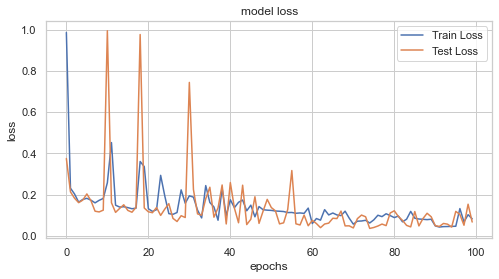

In [96]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [97]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.14778083220203


In [98]:
y_pred = estimator_model.predict(X_test)

2340/2340 [==============================] - 2s 656us/step


In [99]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.06621249131555262
MSE 0.008189028581403763
RMSE 0.09049325157935129
R2 0.9045069698123466


In [100]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.069766
2010-07-09,0.364278,0.213868
2011-07-01,0.005003,-0.014393
2012-01-06,0.015856,-0.032118
2011-08-26,0.000318,-0.036432
...,...,...
2011-01-28,0.169068,0.163713
2010-08-20,0.252860,0.164268
2010-11-26,0.265617,0.267425


4/4 [==============================] - 0s 2ms/step


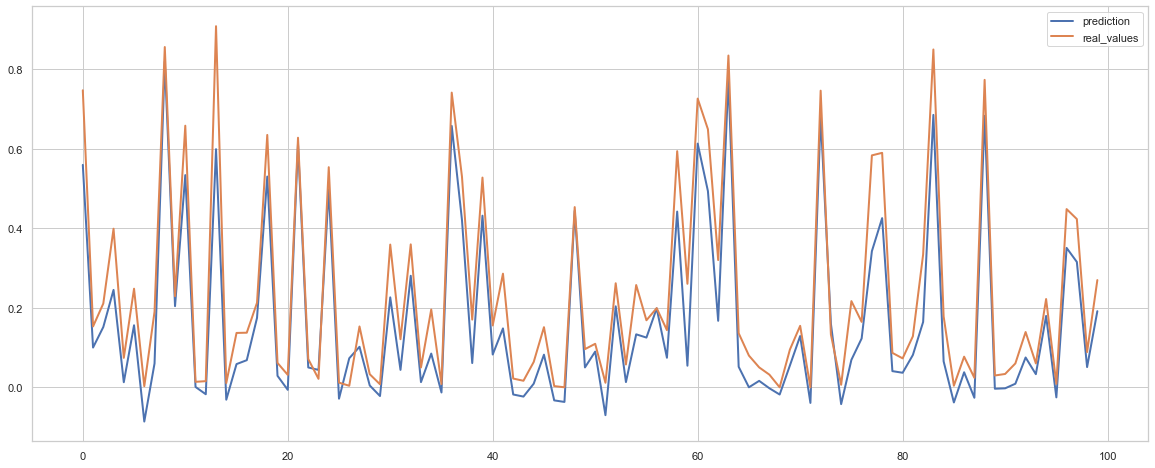

In [108]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0)
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")

comparing models

In [103]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [104]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.278288
1,rf_acc,97.877101
2,knn_acc,91.943408
3,xgb_acc,97.256891
4,dnn_acc,97.147781


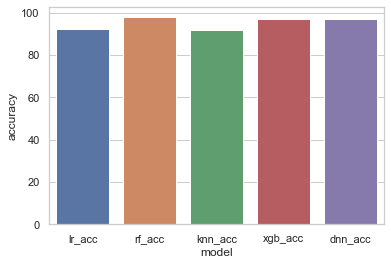

In [106]:
# plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()

PCA

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit(X)

PCA()

In [69]:
#eigenvalues
print('Eigenvalues:')
print(pca.explained_variance_)

Eigenvalues:
[2.01624176e+02 6.82633093e-01 1.54026367e-01 1.17616547e-01
 7.71791125e-02 6.11079250e-02 5.70324993e-02 3.78464072e-02
 2.55624075e-02 2.32649692e-02 1.61342435e-02 1.57481084e-02
 1.56314915e-02 1.55776163e-02 1.53743017e-02 1.48845524e-02
 1.36782858e-02 1.19895208e-02 1.17152585e-02 4.59369420e-03
 3.40784155e-04 7.23246166e-05 5.55649748e-06]


In [70]:
# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[9.93241178e+01 3.36278770e-01 7.58764816e-02 5.79402729e-02
 3.80199806e-02 3.01029910e-02 2.80953544e-02 1.86439002e-02
 1.25925553e-02 1.14607910e-02 7.94805232e-03 7.75783445e-03
 7.70038658e-03 7.67384661e-03 7.57368975e-03 7.33242941e-03
 6.73819826e-03 5.90627868e-03 5.77117157e-03 2.26294601e-03
 1.67877118e-04 3.56285585e-05 2.73724224e-06]


Text(0, 0.5, 'Explained variance (%)')

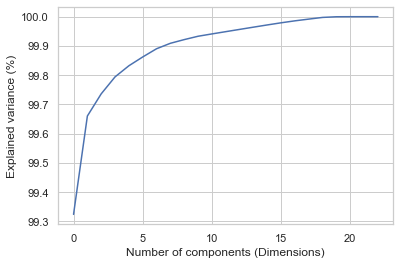

In [71]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [102]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

           0         1         2         3         4         5         6  \
0 -21.244641 -1.250509  0.391973  0.170175 -0.229650 -0.009487  0.132523   
1 -21.244663 -1.240335  0.464665 -0.062574 -0.238284  0.125444 -0.163987   
2 -21.244663 -1.240354  0.464344 -0.060436 -0.238105  0.123555 -0.158409   
3 -21.244843 -1.243198  0.439805  0.135480 -0.232822  0.108819 -0.081314   
4 -21.244679 -1.241019  0.457941 -0.014254 -0.235064  0.092523 -0.067549   

          7         8         9  
0 -0.159505  0.063924 -0.044622  
1 -0.244922 -0.063048  0.083285  
2 -0.245522 -0.062986  0.083182  
3 -0.279980 -0.086107  0.060279  
4 -0.256391 -0.065003  0.087484  

Size: 
(374247, 10)


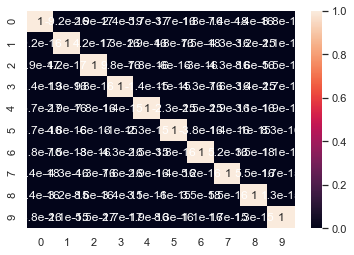

In [103]:
# fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [104]:
X_train, X_test, y_train, y_test=train_test_split(X_pca,Y, test_size=0.2, random_state=50)

linear regression

In [105]:
lr=LinearRegression(normalize=False)
lr.fit(X_train, y_train)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [106]:
lr_acc=lr.score(X_test, y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  91.58950276778958


In [107]:
y_pred=lr.predict(X_test)

In [108]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03215332750503119
MSE 0.0037972556357739316
RMSE 0.06162187627599416
R2 0.9158957870175828


In [109]:
lr_df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
# lr_df.to_csv('lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.119833
2010-07-09,0.364278,0.280947
2011-07-01,0.005003,0.028772
2012-01-06,0.015856,0.021478
2011-08-26,0.000318,0.006110
...,...,...
2011-01-28,0.169068,0.219722
2010-08-20,0.252860,0.237815
2010-11-26,0.265617,0.339510


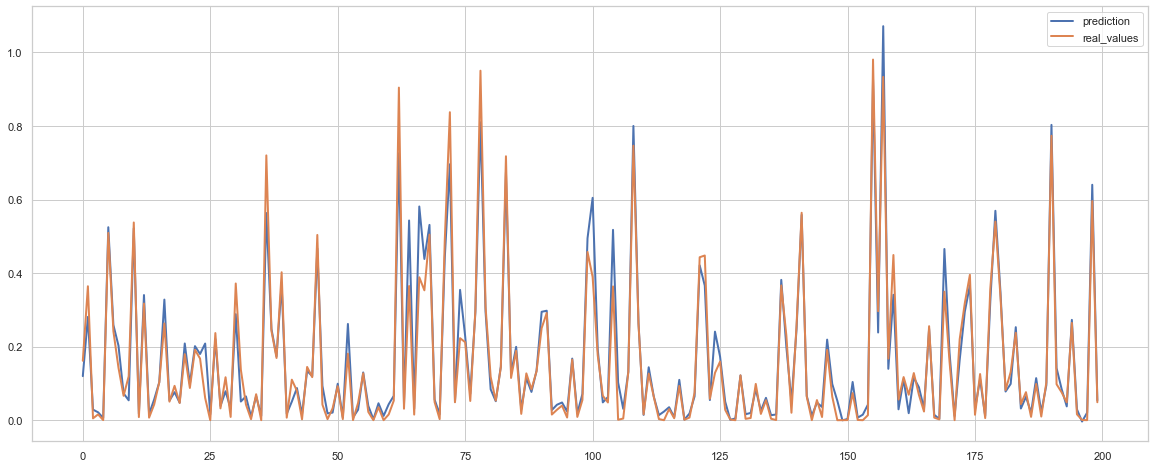

In [110]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()

random forest

In [111]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
rf_acc=rf.score(X_test, y_test)*100
print("Linear Regressor Accuracy - ",rf_acc)

Linear Regressor Accuracy -  93.22095587891629


In [113]:
y_pred=rf.predict(X_test)

In [114]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.028510485733397217
MSE 0.0030606708239983415
RMSE 0.055323329834693985
R2 0.9322100076450369


In [115]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# rf_df.to_csv('rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.124450
2010-07-09,0.364278,0.295434
2011-07-01,0.005003,0.015665
2012-01-06,0.015856,0.015853
2011-08-26,0.000318,0.000732
...,...,...
2011-01-28,0.169068,0.169014
2010-08-20,0.252860,0.239778
2010-11-26,0.265617,0.474367


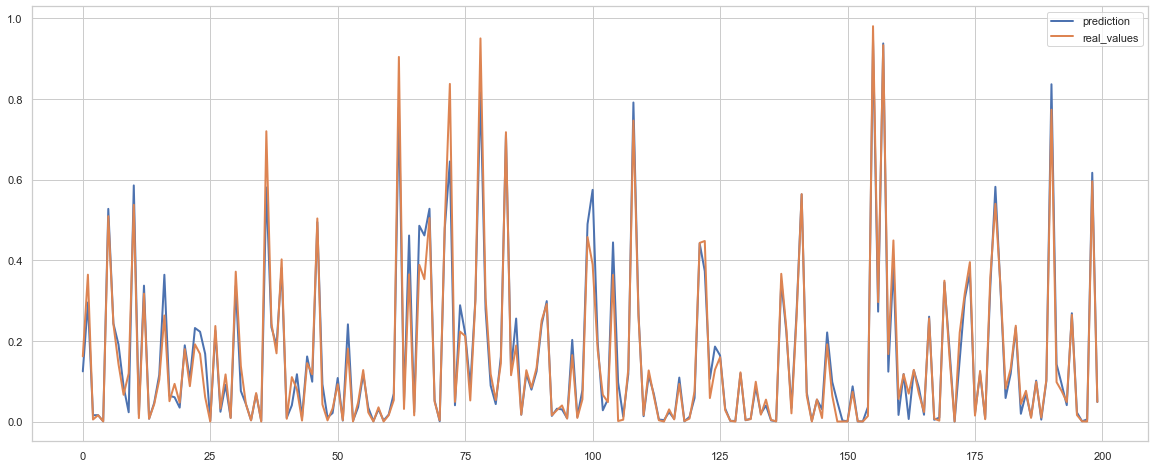

In [116]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0)
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0)
plt.legend(loc="best")
plt.show()